<a href="https://colab.research.google.com/github/KaisuH/iml-tutorials/blob/main/Kopio_IntroToPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Today (26 April 2023)
* Link to this file: bit.ly/3LvfqKs
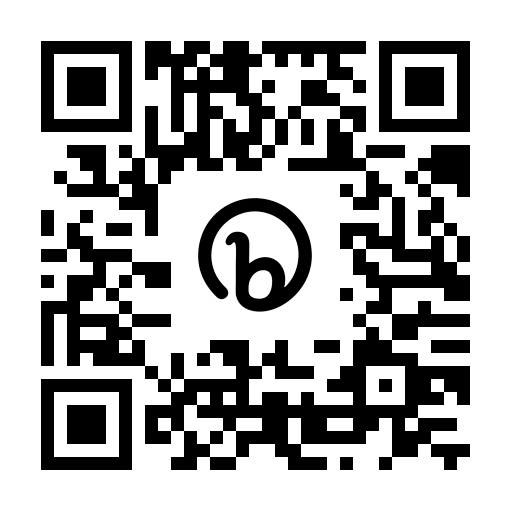
* Quick Introduction to Pytorch
* Using the framework in Colab (Jupyter) Notebooks
* Autograd basics
* Some Basic Guidelines
  * Datasets
  * Model Building
  * Training
  * Evaluating
  * Analysis: Graphing and Plotting
* CNN Example




# What is PyTorch?
 

*   [PyTorch](https://pytorch.org/) is a machine learning framework based on the Torch library.
*   Originally developed by Meta AI and now part of the Linux Foundation umbrella.
*   Free and open-source software released under the modified BSD license.


PyTorch provides many high-level features:

    Tensor computing (like NumPy) with acceleration via GPU
    Tape-based automatic differentiation system
    Deep Neural Network Building Blocks (layers, gradient descent, datasets)

$f(a,b) = 3a^3 - b^2$

$\frac{∂f}{∂a} = 9a^2$

$\frac{∂f}{∂b} = -2b$

$\frac{∂f}{∂f} = 1$

Computational Graph

Conceptually, autograd keeps a record of data (tensors) & all executed operations (along with the resulting new tensors) in a directed acyclic graph (DAG) consisting of Function objects. In this DAG, leaves are the input tensors, roots are the output tensors. By tracing this graph from roots to leaves, you can automatically compute the gradients using the chain rule.

In a forward pass, autograd does two things simultaneously:

    run the requested operation to compute a resulting tensor, and

    maintain the operation’s gradient function in the DAG.

The backward pass kicks off when .backward() is called on the DAG root. autograd then:

    computes the gradients from each .grad_fn,

    accumulates them in the respective tensor’s .grad attribute, and

    using the chain rule, propagates all the way to the leaf tensors.

Below is a visual representation of the DAG in our example. In the graph, the arrows are in the direction of the forward pass. The nodes represent the backward functions of each operation in the forward pass. The leaf nodes in blue represent our leaf tensors a and b.
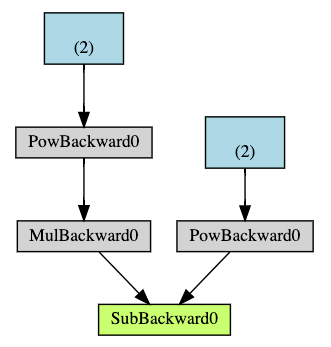

In [1]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
f = 3*a*a*a - b*b
f

tensor([-12.,  65.], grad_fn=<SubBackward0>)

In [ ]:
f.backward(torch.tensor([1., 1.]))

In [ ]:
a.grad

In [ ]:
9*a*a

# Basic Guidelines
* What are you trying to solve? 
  * Regression vs Classification
* Analyze your data
  * reduce parameters, fix bad data, normalize
* Set up end-to-end pipeline first
* Do fancy stuff later: Data Augmentation, Dropouts, Layer Norm
* Data Loading and visualization
* Basic Model: simple network: fully connected, simple CNN
* Verify pipeline before training
* Training: overfit and then regularize
  * dropout, normalization
* Don't change too many hyperparameters at the same time
  * Size of the network, Learning Rate, Batch Size, Optimizer
* Loss functions
  * L2, L1, Cross Entropy
* Evaluation: 
  * plot and print
  * losses, predictions 



# Data Example

![alt text](https://www.tensorflow.org/images/iris_three_species.jpg)

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#----------DATA READING 
filename = 'https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv'
# read file
csv_data = pd.read_csv(filename, sep=',')
print(csv_data.info())
print(csv_data.head(12))


In [ ]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
#----------DATA CLEANUP 
csv_data.columns = column_names # new_header #set the header row as the data header
print(csv_data.head()) 
# look at simple data statistics
print(csv_data.describe().transpose())

In [ ]:
# plot of all features against each other
sns.pairplot(csv_data)

In [ ]:
# a more informative plot
sns.set(style="ticks", color_codes=True)
sns.pairplot(csv_data, hue='species') 

In [ ]:
sns.violinplot(y='species', x='sepal_length', data=csv_data, cut=0)
plt.show()
sns.violinplot(y='species', x='sepal_width', data=csv_data, cut=0)
plt.show()
sns.violinplot(y='species', x='petal_length', data=csv_data, cut=0)
plt.show()
sns.violinplot(y='species', x='petal_width', data=csv_data, cut=0)
plt.show()

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(csv_data.corr(), annot=True)
plt.show()

In [ ]:
#----------TRAIN/TEST SPLIT 
train_data = csv_data.sample(frac=0.8) # take 80% randomly from the data for training
test_data = csv_data.drop(train_data.index) # reserve the rest for testing

# separate out the y (results) from x (features) for training
x_train = train_data.drop('species', axis=1)
y_train = train_data['species']
# normalize the training data
x_train = (x_train-x_train.min())/(x_train.max()-x_train.min())

# separate out the y (results) from x (features) testing
x_test = test_data.drop('species', axis=1)
y_test = test_data['species']
# normalize the test data
x_test = (x_test-x_test.min())/(x_test.max()-x_test.min()) 

print('Training Data\n', x_train.describe().transpose())
print('Test Data\n', x_test.describe().transpose())

In [ ]:
import torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
# Convert to Tensors
x_train = torch.FloatTensor(x_train.values)
x_test = torch.FloatTensor(x_test.values)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [ ]:
print(x_train, x_train.shape)

In [ ]:
# Build the model
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4,3)                                   
        self.out = nn.Linear(3, 3)      
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.out(x)
        return x

In [ ]:
mymodel = Model()
print(mymodel)

In [ ]:
with torch.no_grad():
    mymodel.eval()
    y_pred = mymodel.forward(x_test)
    print(y_pred)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mymodel.parameters(), lr=0.01)

In [ ]:
epochs = 100
losses = []

for i in range(epochs):
    y_pred = mymodel.forward(x_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
# Plot the loss
axes = plt.plot([i for i in range(epochs)], [item.item() for item in losses])
loss.it

In [ ]:
torch.set_printoptions(sci_mode=False)
with torch.no_grad():
    mymodel.eval()
    y_pred = mymodel.forward(x_test)
    #print(y_pred.softmax(dim=1))
    y_hat = y_pred.argmax(dim=1)
    print(y_hat)

#print(y_hat.values())

In [ ]:
df = pd.DataFrame({'Y': y_test, 'YHat': y_hat})
df['Correct'] = df['Y']==df['YHat']
print(df)

In [ ]:
100*df['Correct'].sum() / len(df)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(df['Y'], df['YHat']))

In [ ]:
cm = confusion_matrix(df['Y'], df['YHat'], labels=[0, 1, 2])

In [ ]:
sns.heatmap(cm, annot=True)

#Convolutional Neural Network (CNN)!

Implement a version of the CNN from 1998 LeNet-5 paper

http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf








In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

import torchvision.transforms as transforms
import torchvision.datasets as datasets

import matplotlib.pyplot as plt

In [ ]:
# Download an image from the internet

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/Julemotiv_tegnet_av_Jenny_Nystr%C3%B8m_%2824207693358%29.jpg/525px-Julemotiv_tegnet_av_Jenny_Nystr%C3%B8m_%2824207693358%29.jpg"
!curl "$url" --output 'image.jpg'

# Basic Image Reading and Plotting

In [ ]:
from PIL import Image
 
img = Image.open('image.jpg')

# display the image
plt.imshow(img)
plt.show()

def showzoomed(ttensor, x1, x2, y1, y2):
  plt.xlim(x1, x2)
  plt.ylim(y1, y2)
  plt.imshow(ttensor.permute(1, 2, 0), cmap='gray')
  plt.show()

# convert the image to a pytorch tensor
convert_tensor = transforms.ToTensor()
img_t = convert_tensor(img)
print('Original Image Dimensions:', img_t.shape)

# convert the image to grayscale
convert_tensor = transforms.Grayscale()
img_g = convert_tensor(img_t[:3,:,:])
print('Grayscale Image Dimensions', img_g.shape)

# display grayscale image
plt.imshow(img_g.permute(1, 2, 0), cmap='gray')
plt.show()
# zoom
showzoomed(img_g, 300, 450, 300, 150)

# Convolution

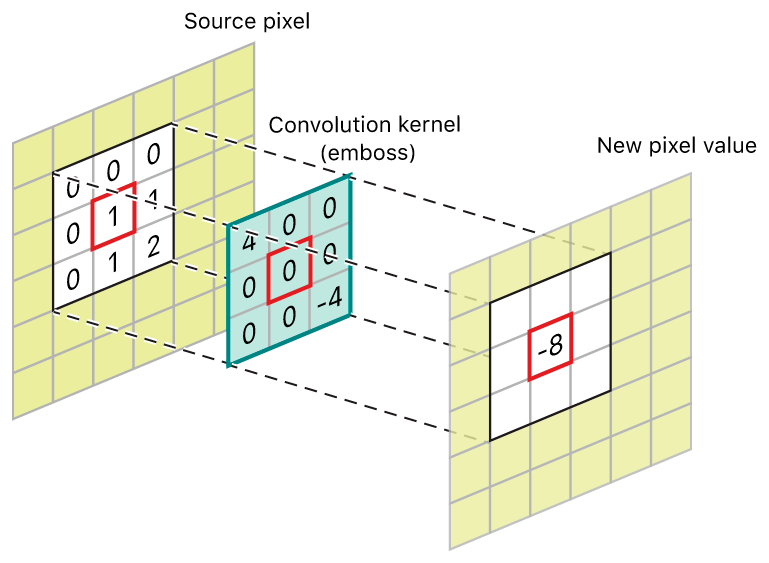

In [ ]:
# create a 3x3 convolution kernel (this kernel does box-blur)
# see # https://en.wikipedia.org/wiki/Kernel_(image_processing) 
#       https://docs.gimp.org/2.6/en/plug-in-convmatrix.html for more kernels

# blur kernel
conv_kernel = 0.11*torch.tensor([[[[1.,1.,1.],
                                   [1.,1.,1.],
                                   [1.,1.,1.]]]])

# emboss kernel
conv_kernel = 1.0*torch.tensor([[[[-2.,-1.,0.],
                                  [-1.,1.,1.],
                                  [0.,1.,2.]]]])


print(conv_kernel.shape)

# convolve the image and the kernel
output = F.conv2d(img_g, conv_kernel, padding = 1)
# display convolved image
plt.imshow(output.permute(1, 2, 0), cmap='gray')
plt.show()
# zoom
showzoomed(output, 300, 450, 300, 150)

# Convolutional Neural Network (CNN)

http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf

In [ ]:
# download the built in mnist dataset of handwritten digits
dataset_train = datasets.MNIST(
    root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)
dataset_test = datasets.MNIST(
    root='./data',
    train=False,
    transform=transforms.ToTensor(),
    #download=True
)
train_loader = DataLoader(
    dataset_train,
    num_workers=2,
    batch_size=10,
    shuffle=True
)
test_loader = DataLoader(
    dataset_test,
    num_workers=2,
    batch_size=10000,
    shuffle=True
)

In [ ]:
print(len(dataset_train), len(dataset_test))

In [ ]:
# Display image and label.
i = iter(train_loader)
features, labels = next(i)
print(f"Num batches: {len(train_loader)}")
print(f"Feature batch shape: {features.size()}")
print(f"Labels batch shape: {labels.size()}")
img = features[0].squeeze()
label = labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")
print(len(test_loader))

# Resources
# https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d
# https://github.com/vdumoulin/conv_arithmetic
# https://poloclub.github.io/cnn-explainer/

# Model

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1) # in, out, kernel, padding
        # [(W−K+2P)/S]+1 : (28-3+2)/1 + 1 = 28 ==> 28x28x32
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        # [(W−K+2P)/S]+1: (28-3+2)/1 + 1 = 28 ==> 28x28x64
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

# Train

In [ ]:
model = MyModel()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

losses = []
epochs = 1
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        #print(data.shape, target.shape)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        losses.append(loss)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 100 == 0:
            print('Epoch {}, Batch idx {}, loss {}'.format(
                   epoch, batch_idx, loss.item()))

# Test

In [ ]:
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
        pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        print(pred, target)
        correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_openml



In [ ]:
# Display the confusion matrix as a heatmap
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
arr = confusion_matrix(target.numpy().squeeze(), pred.numpy().squeeze(), labels=class_names)
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize = (9,6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.show()

In [ ]:
# Visualize kernels

from torchvision.utils import make_grid

kernels = model.conv1.weight.detach().clone()
kernels = kernels - kernels.min()
kernels = kernels / kernels.max()
img = make_grid(kernels)
plt.imshow(img.permute(1, 2, 0))

In [ ]:

# Visualize intermediate results
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

model.conv1.register_forward_hook(get_activation('conv1'))
data, _ = dataset_train[1]
data.unsqueeze_(0)
output = model(data)

act = activation['conv1'].squeeze()
print(act.shape)
fig, axarr = plt.subplots(act.size(0))
fig.set_size_inches(1.0, 32, forward=True)
plt.axis('off')
for idx in range(act.size(0)):
    axarr[idx].axis('off')
    axarr[idx].imshow(act[idx], cmap='gray')